# Exploratory Data Analysis (EDA)
In this notebook, we explore patterns in the engineered dataset to:

- Understand customer behavior
- Identify churn signals
- Analyze financial stress indicators
- Detect relationships between features and attrition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load engineered dataset
df = pd.read_csv("../data/engineered_bank_data.csv")
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (10127, 47)


,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Utilization_Category_Low,Utilization_Category_Medium
0,768805383,Existing Customer,45,3,39,5,1,3,12691.0,777,...,False,True,False,False,False,False,False,False,True,False
1,818770008,Existing Customer,49,5,44,6,1,2,8256.0,864,...,False,False,False,True,False,False,False,False,True,False
2,713982108,Existing Customer,51,3,36,4,1,0,3418.0,0,...,False,False,True,False,False,False,False,False,True,False
3,769911858,Existing Customer,40,4,34,3,4,1,3313.0,2517,...,False,False,False,True,False,False,False,False,False,True
4,709106358,Existing Customer,40,3,21,5,1,0,4716.0,0,...,False,True,False,False,False,False,False,False,True,False


## Target Variable Distribution
We analyze churn distribution to understand class imbalance.

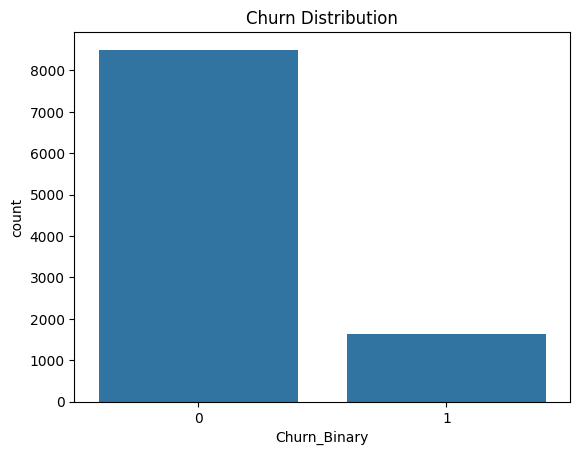

Churn_Binary
0    0.83934
1    0.16066
Name: proportion, dtype: float64


In [2]:
plt.figure()
sns.countplot(x='Churn_Binary', data=df)
plt.title('Churn Distribution')
plt.show()

print(df['Churn_Binary'].value_counts(normalize=True))

## Credit Utilization vs Churn
We examine whether high utilization customers are more likely to churn.



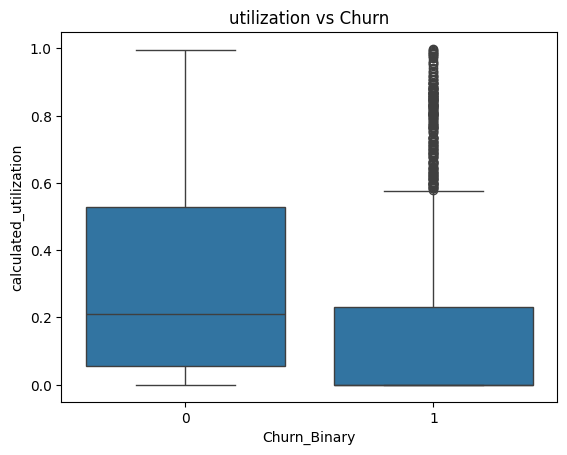

In [3]:
plt.figure()
sns.boxplot(x='Churn_Binary', y='calculated_utilization', data=df)
plt.title('utilization vs Churn')
plt.show()

## Transaction Behavior 
We analyze transaction amount and count differences between churned and retained customers.

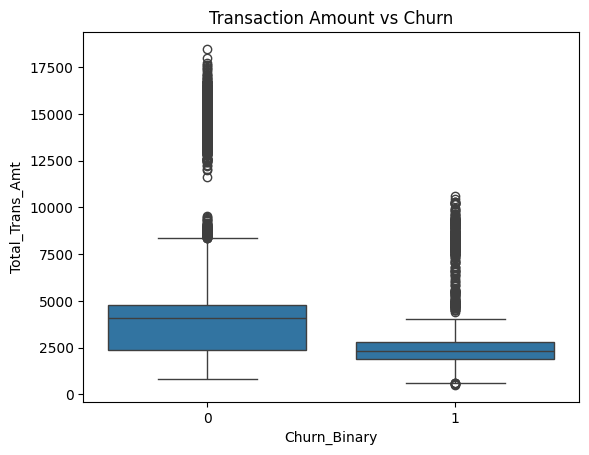

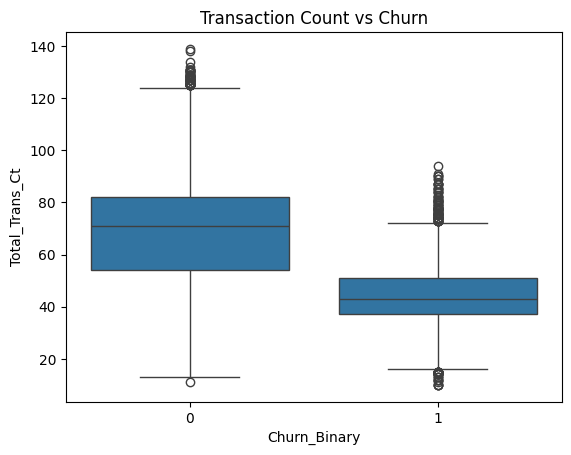

In [4]:
plt.figure()
sns.boxplot(x='Churn_Binary', y='Total_Trans_Amt', data=df)
plt.title('Transaction Amount vs Churn')
plt.show()

plt.figure()
sns.boxplot(x='Churn_Binary', y='Total_Trans_Ct', data=df)
plt.title("Transaction Count vs Churn")
plt.show()

## Inactivity and Churn
Customers inactive for multiple months may show churn behavior.

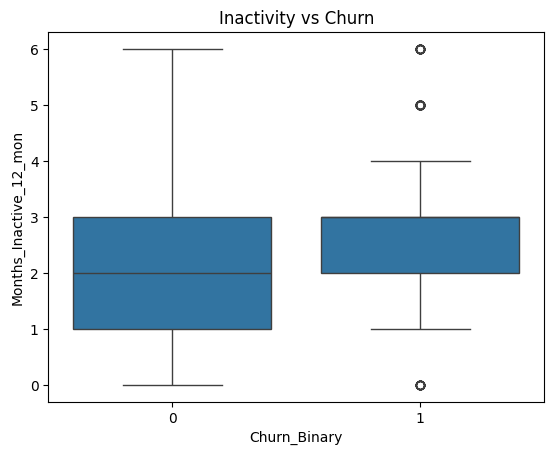

In [5]:
plt.figure()
sns.boxplot(x='Churn_Binary', y='Months_Inactive_12_mon', data=df)
plt.title("Inactivity vs Churn")
plt.show()

## Correlation Analysis
We evaluate relationships among numerical features.

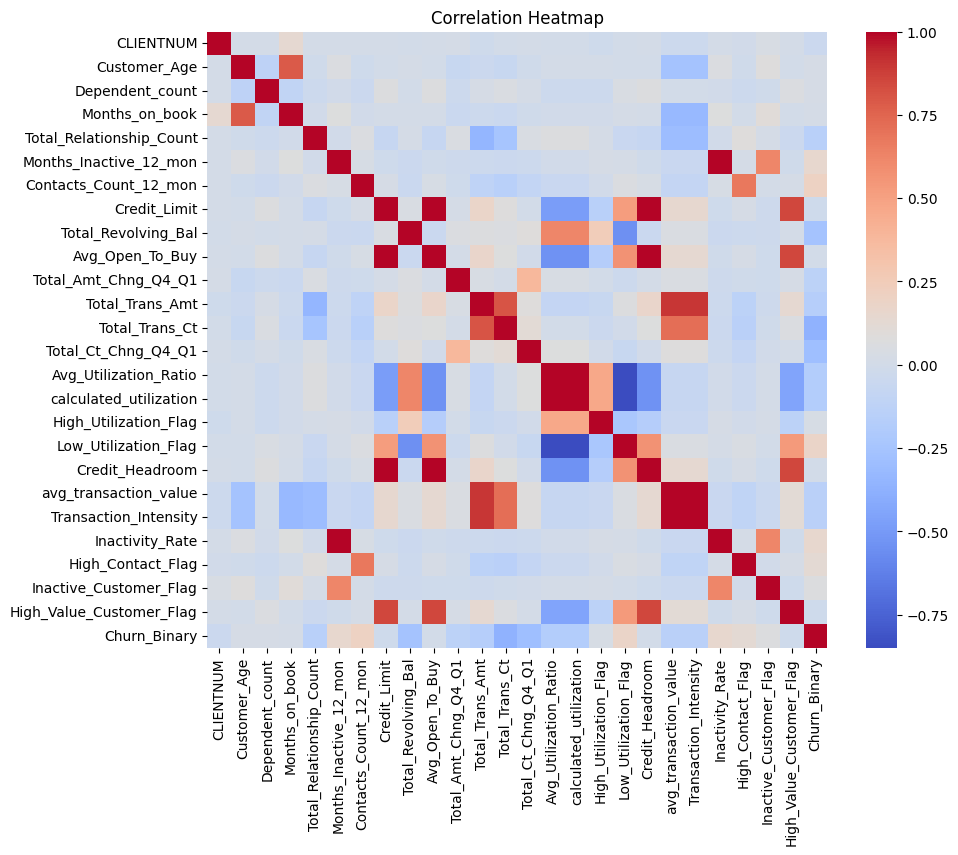

In [6]:
plt.figure(figsize=(10,8))

numeric_df = df.select_dtypes(include=['int64', 'float64'])

sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=False)

plt.title("Correlation Heatmap")
plt.show()

## High Utilization Flag Impact
We check churn rate among high utilization customers.

In [7]:
pd.crosstab(df['High_Utilization_Flag'], df['Churn_Binary'], normalize='index')

Churn_Binary,0,1
High_Utilization_Flag,,
0,0.841391,0.158609
1,0.797009,0.202991


## High Contact Frequency Impact
Frequent customer service contacts may indicate dissatisfaction.

In [8]:
pd.crosstab(df['High_Contact_Flag'], df['Churn_Binary'], normalize='index')

Churn_Binary,0,1
High_Contact_Flag,,
0,0.859024,0.140976
1,0.736128,0.263872


## EDA Summary
Key Observations:

- Churn distribution reveals class imbalance.
- High utilization customers show higher churn probability.
- Lower transaction counts correlate with churn.
- Increased inactivity months strongly associated with attrition.
- Customer contact frequency may indicate dissatisfaction signals.

These insights confirm that behavioral and financial features are strong predictors of customer attrition.